In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score

from sklearn import metrics

from sklearn.metrics import r2_score

In [ ]:
patient_dt = pd.read_excel("/content/drive/MyDrive/Data Science Competition Dec 2022/Patient_Data_KDAG_Hackathon/Patient_Data_KDAG_Hackathon.xlsx")

In [ ]:
patient_dt.head()

,Patient ID,Physician_ID,Date_of_Visit,Year of Birth,Gender,Geographical_State
0,16445,axt01951,2020-01-12,1962.0,F,ME
1,16445,axt01951,2019-09-25,1962.0,F,ME
2,16445,axt01951,2019-02-12,1962.0,F,ME
3,16445,axt01951,2019-11-07,1962.0,F,ME
4,16445,axt01951,2019-04-17,1962.0,F,ME


In [ ]:
hcp_dt = pd.read_excel("/content/drive/MyDrive/Data Science Competition Dec 2022/HCP_Data_KDAG_Hackathon/HCP_Data_KDAG_Hackathon.xlsx")             

In [ ]:
hcp_dt.Physician_Segment.value_counts()

3-Low       252966
2-Medium    187302
1-High      129732
Name: Physician_Segment, dtype: int64

In [ ]:
hcp_dt.Specialty.value_counts()

Dermatologist         456798
General Physician      90687
Nurse Practitioner     22515
Name: Specialty, dtype: int64

In [ ]:
print("unique Patient ID : ",patient_dt["Patient ID"].nunique())
print("unique Physician_ID : ",patient_dt["Physician_ID"].nunique())

unique Patient ID :  39956
unique Physician_ID :  9229


In [ ]:
patient_dt.shape

(724324, 6)

In [ ]:
hcp_dt.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist


In [ ]:
patient_dt[patient_dt["Physician_ID"]=="axt00001"]

,Patient ID,Physician_ID,Date_of_Visit,Year of Birth,Gender,Geographical_State
708694,10378,axt00001,2019-04-15,1946.0,M,IA
708695,10378,axt00001,2019-02-26,1946.0,M,IA
708696,10378,axt00001,2019-04-29,1946.0,M,IA
708697,10378,axt00001,2019-12-07,1946.0,M,IA
708698,10384,axt00001,2019-05-09,1946.0,F,NV
708699,10384,axt00001,2019-07-12,1946.0,F,NV
708700,10384,axt00001,2020-01-27,1946.0,F,NV
708701,10384,axt00001,2019-07-07,1946.0,F,NV


In [ ]:
hcp_dt[hcp_dt ["Physician_ID"]=="axt00001"]

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist
5,axt00001,20190208,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist
6,axt00001,20190215,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist
7,axt00001,20190222,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist
8,axt00001,20190301,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist
9,axt00001,20190308,0.000,9.15138,0,0,3-Low,1,0,0,Dermatologist


In [ ]:
hcp_dt

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist
...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist


In [ ]:
tp=hcp_dt.groupby(["Physician_ID","Time_Period"])

In [ ]:
tp.first()


Brand_Rx  Market_Rx  Sales_Rep_Calls  \
Physician_ID Time_Period                                         
axt00001     20190104          0.0    2.80567                1   
             20190111          0.0   20.57312                1   
             20190118          0.0    6.16010                1   
             20190125          0.0    8.95501                1   
             20190201          0.0    9.13793                1   
...                            ...        ...              ...   
axt10000     20200103          0.0    2.45597                0   
             20200110          0.0    2.38065                0   
             20200117          0.0    7.42171                0   
             20200124          0.0    5.39345                0   
             20200131          0.0    0.00000                0   

                          Samples_Dropped Physician_Segment  Emails_Delivered  \
Physician_ID Time_Period                                                        
axt00001     20190104                   0             3-Low                 0   
             20190111                   0             3-Low                 0   
             20190118                   0             3-Low                 0   
             20190125                   5             3-Low                 0   
             20190201                   0             3-Low                 0   
...                                   ...               ...               ...   
axt10000     20200103                   0             3-Low                 1   
             20200110                   0             3-Low                 0   
             20200117                   0             3-Low                 1   
             20200124                   0             3-Low                 1   
             20200131                   0             3-Low                 0   

                          Speaker_Programs_Attended  Vouchers_Dropped  \
Physician_ID Time_Period                                                
axt00001     20190104                             0                 0   
             20190111                             0                 0   
             20190118                             0                 0   
             20190125                             0                 0   
             20190201                             0                 0   
...                                             ...               ...   
axt10000     20200103                             0                 0   
             20200110                             0                 0   
             20200117                             0                 0   
             20200124                             0                 0   
             20200131                             0                 0   

                              Specialty  
Physician_ID Time_Period                 
axt00001     20190104     Dermatologist  
             20190111     Dermatologist  
             20190118     Dermatologist  
             20190125     Dermatologist  
             20190201     Dermatologist  
...                                 ...  
axt10000     20200103     Dermatologist  
             20200110     Dermatologist  
             20200117     Dermatologist  
             20200124     Dermatologist  
             20200131     Dermatologist  

[570000 rows x 9 columns]

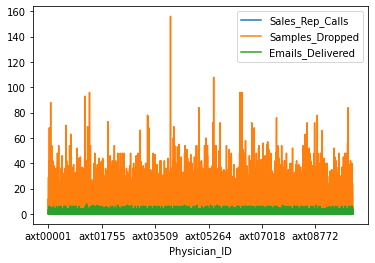

In [ ]:
hcp_dt.plot(x='Physician_ID',y=['Sales_Rep_Calls','Samples_Dropped','Emails_Delivered'])
plt.show()

In [ ]:
hcp_dt.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist


In [ ]:
hcp_dt.describe()

,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped
count,5.700000e+05,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,2.019150e+07,0.682828,7.988949,0.391295,0.865719,0.271174,0.005746,0.042044
std,2.693162e+03,1.369037,10.599537,0.488041,3.437103,0.710370,0.076183,0.448897
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019072e+07,0.000000,5.081410,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.019102e+07,1.004000,10.910640,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020013e+07,64.255000,259.966980,1.000000,156.000000,8.000000,2.000000,23.000000


In [ ]:
hcp_dt.corr()

,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped
Time_Period,1.000000,-0.000106,0.002597,-0.017724,-0.001065,-0.061163,-0.014098,0.052627
Brand_Rx,-0.000106,1.000000,0.632370,0.255493,0.231845,0.038643,0.038077,0.050632
Market_Rx,0.002597,0.632370,1.000000,0.280123,0.197031,0.038625,0.039702,0.039275
Sales_Rep_Calls,-0.017724,0.255493,0.280123,1.000000,0.311382,0.062648,0.085761,0.115945
Samples_Dropped,-0.001065,0.231845,0.197031,0.311382,1.000000,0.031204,0.035629,0.105101
Emails_Delivered,-0.061163,0.038643,0.038625,0.062648,0.031204,1.000000,0.013126,0.001344
Speaker_Programs_Attended,-0.014098,0.038077,0.039702,0.085761,0.035629,0.013126,1.000000,0.008326
Vouchers_Dropped,0.052627,0.050632,0.039275,0.115945,0.105101,0.001344,0.008326,1.000000


In [ ]:
hcp_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Physician_ID               570000 non-null  object 
 1   Time_Period                570000 non-null  int64  
 2   Brand_Rx                   570000 non-null  float64
 3   Market_Rx                  570000 non-null  float64
 4   Sales_Rep_Calls            570000 non-null  int64  
 5   Samples_Dropped            570000 non-null  int64  
 6   Physician_Segment          570000 non-null  object 
 7   Emails_Delivered           570000 non-null  int64  
 8   Speaker_Programs_Attended  570000 non-null  int64  
 9   Vouchers_Dropped           570000 non-null  int64  
 10  Specialty                  570000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 47.8+ MB


In [ ]:
hcp_dt['RX_Ratio']=(hcp_dt['Brand_Rx']/hcp_dt['Market_Rx'])

In [ ]:
hcp_dt.head(10)

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,RX_Ratio
0,axt00001,20190104,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist,0.000000
1,axt00001,20190111,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist,0.000000
2,axt00001,20190118,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist,0.000000
3,axt00001,20190125,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist,0.000000
4,axt00001,20190201,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist,0.000000
5,axt00001,20190208,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist,0.076459
6,axt00001,20190215,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist,0.000000
7,axt00001,20190222,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist,0.000000
8,axt00001,20190301,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist,0.000000
9,axt00001,20190308,0.000,9.15138,0,0,3-Low,1,0,0,Dermatologist,0.000000


In [ ]:
hcp_dt.drop(['Speaker_Programs_Attended','Vouchers_Dropped','Specialty'],axis=1)

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,RX_Ratio
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0.0
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0.0
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0.0
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0.0
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0.0
...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0.0
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0.0
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0.0
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score

from sklearn import metrics

from sklearn.metrics import r2_score

In [ ]:
df= pd.read_excel("/content/drive/MyDrive/Data Science Competition Dec 2022/HCP_Data_KDAG_Hackathon/HCP_Data_KDAG_Hackathon.xlsx")             

In [ ]:
df.head(50)

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,20190104,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,20190111,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,20190118,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,20190125,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,20190201,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist
5,axt00001,20190208,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist
6,axt00001,20190215,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist
7,axt00001,20190222,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist
8,axt00001,20190301,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist
9,axt00001,20190308,0.000,9.15138,0,0,3-Low,1,0,0,Dermatologist


In [ ]:
df=df.drop(['Speaker_Programs_Attended','Vouchers_Dropped','Specialty'],axis=1)

In [ ]:
df.head(10000)

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered
0,0,20190104,0.000,2.80567,1,0,2,0
1,0,20190111,0.000,20.57312,1,0,2,0
2,0,20190118,0.000,6.16010,1,0,2,0
3,0,20190125,0.000,8.95501,1,5,2,0
4,0,20190201,0.000,9.13793,1,0,2,0
...,...,...,...,...,...,...,...,...
9995,175,20190524,0.000,3.08274,0,0,2,0
9996,175,20190531,0.962,2.58778,0,0,2,0
9997,175,20190607,0.000,0.00000,0,0,2,0
9998,175,20190614,0.000,0.00000,0,0,2,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Physician_ID       570000 non-null  int64  
 1   Time_Period        570000 non-null  int64  
 2   Brand_Rx           570000 non-null  float64
 3   Market_Rx          570000 non-null  float64
 4   Sales_Rep_Calls    570000 non-null  int64  
 5   Samples_Dropped    570000 non-null  int64  
 6   Physician_Segment  570000 non-null  int64  
 7   Emails_Delivered   570000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 34.8 MB


In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Physician_ID'])
df['Physician_ID'] = labelEncoder.transform(df['Physician_ID'])

labelEncoder.fit(df['Physician_Segment'])
df['Physician_Segment'] = labelEncoder.transform(df['Physician_Segment'])

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_
sil_score = silhouette_score(df_scaled, labels, sample_size=15000)
print('Silhouette score: ', sil_score)

Silhouette score:  0.3782949249983951


In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [ ]:
def channel_affinity_score(x):
    inverse = 1/x
    return softmax(inverse)

In [ ]:
def channel_affinity_score(x):
    inverse = 1/x
    return softmax(inverse)

In [ ]:
def label_affinity(x):
    cluster_label = {0:'Sales_Rep_Calls', 1:'Samples_Dropped', 2: 'Emails_Delivered'}
    clus = kmeans.predict(x)
    label = cluster_label[clus[0]]
    
    distance = kmeans.transform(x)
    affinity = channel_affinity_score(distance)
    return label, affinity[0]

In [ ]:
dic = {'Sales_Rep_Calls':0,'Samples_Dropped':1, 'Emails_Delivered':2}
lst=[]
for i in range(10000):
  datapoint = df_scaled[i]
  dpReshaped = datapoint.reshape(1, -1)
  label, affinity = label_affinity(dpReshaped)
  lst.append(label)


In [ ]:
lst

['Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Samples_Dropped',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Samples_Dropped',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Samples_Dropped',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Sales_Rep_Calls',
 'Samples_Dropped',


In [ ]:
lst2=[]
for i in lst:
  if i=='Sales_Rep_Calls':
    lst2.append(0)
  elif i=='Samples_Dropped':
    lst2.append(1)
  else:
    lst2.append(2) 



In [ ]:
lst2


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,


In [ ]:
import csv
with open("/content/file.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(lst2)

In [ ]:
hcp_dt

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,RX_Ratio
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist,0.0
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist,0.0
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist,0.0
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist,0.0
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist,0.0
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist,0.0
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist,0.0
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist,0.0


In [ ]:
hcp_dt.shape

(570000, 12)

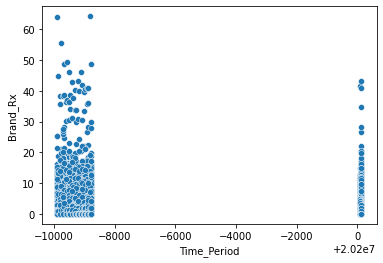

In [ ]:
sns.scatterplot(x="Time_Period", y="Brand_Rx", data=hcp_dt) 

In [ ]:
hcp_dt['Physician_Segment'].head(50)

0     3-Low
1     3-Low
2     3-Low
3     3-Low
4     3-Low
5     3-Low
6     3-Low
7     3-Low
8     3-Low
9     3-Low
10    3-Low
11    3-Low
12    3-Low
13    3-Low
14    3-Low
15    3-Low
16    3-Low
17    3-Low
18    3-Low
19    3-Low
20    3-Low
21    3-Low
22    3-Low
23    3-Low
24    3-Low
25    3-Low
26    3-Low
27    3-Low
28    3-Low
29    3-Low
30    3-Low
31    3-Low
32    3-Low
33    3-Low
34    3-Low
35    3-Low
36    3-Low
37    3-Low
38    3-Low
39    3-Low
40    3-Low
41    3-Low
42    3-Low
43    3-Low
44    3-Low
45    3-Low
46    3-Low
47    3-Low
48    3-Low
49    3-Low
Name: Physician_Segment, dtype: object

In [ ]:
X = hcp_dt[['month','Sales_Rep_Calls','Samples_Dropped','Emails_Delivered']].values

In [ ]:
y=hcp_dt['Brand_Rx'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
hcp_dt['Time_Period']=hcp_dt['Time_Period'].astype(str)
hcp_dt['month']=hcp_dt['Time_Period'].str.slice(4,6)
hcp_dt

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,RX_Ratio,month
0,axt00001,20190104,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist,0.0,01
1,axt00001,20190111,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist,0.0,01
2,axt00001,20190118,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist,0.0,01
3,axt00001,20190125,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist,0.0,01
4,axt00001,20190201,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist,0.0,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,20200103,0.0,2.45597,0,0,3-Low,1,0,0,Dermatologist,0.0,01
569996,axt10000,20200110,0.0,2.38065,0,0,3-Low,0,0,0,Dermatologist,0.0,01
569997,axt10000,20200117,0.0,7.42171,0,0,3-Low,1,0,0,Dermatologist,0.0,01
569998,axt10000,20200124,0.0,5.39345,0,0,3-Low,1,0,0,Dermatologist,0.0,01


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(model.intercept_)

In [ ]:
print(model.coef_)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_model1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [ ]:
df_model1

In [ ]:
df1 = df_model1.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
r2_score(y_test.flatten(), y_pred.flatten())

In [ ]:
X = hcp_dt[['month','Sales_Rep_Calls','Samples_Dropped','Emails_Delivered']].values
y = hcp_dt['Brand_Rx'].values.reshape(-1,1)

In [ ]:
hcp_dt['Time_Period']=hcp_dt['Time_Period'].astype(str)
t=hcp_dt['Time_Period'].str.slice(4,6)
print(t)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dTree_clf = DecisionTreeClassifier()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [ ]:
dTree_clf.fit(X_train,y_train)

In [ ]:
y_pred2 = dTree_clf.predict(X_test)

In [ ]:
y_pred2

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred2))

In [ ]:
df_model4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})

In [ ]:
df2 = df_model4.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
X = hcp_dt[['month','Sales_Rep_Calls','Samples_Dropped','Emails_Delivered']].values
y = hcp_dt['Brand_Rx'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
RandomForestRegModel = RandomForestRegressor()

In [ ]:
RandomForestRegModel.fit(X_train,y_train)

In [ ]:
y_pred=RandomForestRegModel.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Accuracy',100*max(0,rmse)) 

In [ ]:
RandomForestRegModel.score(X_test, y_test)

In [ ]:
y_pred

In [ ]:
df_model3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [ ]:
df2 = df_model3.head(50)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
hcp_dt.head(50)

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty,RX_Ratio,month
0,0,20190104,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist,0.000000,01
1,0,20190111,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist,0.000000,01
2,0,20190118,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist,0.000000,01
3,0,20190125,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist,0.000000,01
4,0,20190201,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist,0.000000,02
5,0,20190208,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist,0.076459,02
6,0,20190215,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist,0.000000,02
7,0,20190222,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist,0.000000,02
8,0,20190301,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist,0.000000,03
9,0,20190308,0.000,9.15138,0,0,3-Low,1,0,0,Dermatologist,0.000000,03


In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(hcp_dt['Physician_ID'])
df['Physician_ID'] = labelEncoder.transform(df['Physician_ID'])